
# Project: Investigate a Dataset (TMDb Movie Dataset)


## Table of Contents

[Introduction](#Introduction)

[Creating a Copy of The Dataset](#Creating-a-Copy-of-The-Dataset)

[Making a Copy of The Dataset](#Making-a-Copy-of-The-Dataset)

[Data Cleaning](#Data-Cleaning)

[Exporting the Cleaned Data to a New CSV](#Exporting-the-Cleaned-Data-to-a-New-CSV)

[Exploratory Data Analysis](#Exploratory-Data-Analysis)

[Visual Trends](#Visual-Trends)

[Conclusion](#Conclusion)


## Introduction

This dataset contains information about over 10,000 movies collected from the movie database (TMDB), which was collected between 1960 and 2015, with information such as title, budget, revenue, cast, director, genres, release date, release year, runtime, etc. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

The primary goals of the project include data collation and exploratory data analysis . This project uses Python's Pandas library to evaluate and clean data for fast visualization and exploration through the built-in functions of Pandas in data analysis and, finally, by descriptive statistics Matplotlib to visualize the results.

- Question 1. What are the top 20 movies based on their popularity? 

- Question 2: How do movie budgets and profits compare? Does a high budget equal a high profit?

- Question 3. What is the relationship between the popularity and the runtime of movies?

- Question 4. The top 10 actors? What is the movie title, average vote count and the revenue generated?

- Question 5. Which genre has the highest release of movies? 

- Question 9. Which Month Released The Highest Number Of Movies In All Of The Years? And which month made the highest average revenue?

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.express as go
import matplotlib.pyplot as plt

In [3]:
#reading through the data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#decription of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#columns with null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#the number of rows and columns 
df.shape

(10866, 21)

In [8]:
#counts of duplicated values in each columns
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [9]:
#the unique values in twitter enhanced archive csv information
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Creating a Copy of The Dataset

In [10]:
# creating a copy of the dataset
df_m = df.copy()

## Data Cleaning

#### Issue 1:  Replacing the `cast` null values with `None` and seperating their details to get the exact cast details for each movie

In [11]:
#function to replace the slashes column and null values with None
def column__replace(column):
    column = str(column).replace("|",",")
    column = column.replace('nan', 'None')
    return column

In [12]:
#replacing using the replace function
df_m['cast'] = df_m['cast'].apply(column__replace)

#### Issue 2:  Replacing the `keywords` null values with `None` and seperating their details to get the exact keywords 

In [13]:
#replacing using the replace function
df_m['keywords'] = df_m['keywords'].apply(column__replace)

#### Issue 3:  Replacing the `genres` null values with `None` and seperating their details to get the exact genres

In [14]:
#replacing using the replace function
df_m['genres'] = df_m['genres'].apply(column__replace)

#### Issue 4:  Replacing the `production_companies` null values with `None` and seperating their details to get the exact production_companies

In [15]:
#replacing using the replace function
df_m['production_companies'] = df_m['production_companies'].apply(column__replace)

#### Issue 5: Replacing the directors Nan values with `None`

In [16]:
df_m['director'] = df_m['director'].fillna('None')

#### Issue 6:  Normalizing the `release date` to extract the `release week day` and `release month`

In [17]:
#to extract the weekdays
df_m['release_date_of_week'] = pd.to_datetime(df_m.release_date).dt.day_name()

#to extract the month
df_m['month'] = pd.to_datetime(df_m.release_date).dt.strftime('%b')

#### Issue 7:  Extracting the profit generated from the budget and revenue

In [18]:
#i would be using the budget and revenue adjustment, this is because the initial budget and revenue is likely to be proposed  and not implemented
df_m['profit'] = df_m['revenue_adj']- df_m['budget_adj']

#### Issue 8:  Creating a range for the `release year`

In [19]:
#categorising release year to different year ranges
bins = [-1, 1960, 1965, 1970, 1980, 1990, 2000, np.inf]
names = ['<1960','1960-1970', '1970-1980','1980-1990', '1990-2000', '2000-2010', '2010-2020']
        
#grouping year into different year groups 
df_m['release_year_ranges'] = pd.cut(df_m['release_year'], bins, labels = names)

#Creating an index for release year groups to enable in an ascending order
movies_year_index = ['<1960','1960-1970', '1970-1980','1980-1990', '1990-2000', '2000-2010', '2010-2020']

# Ordering the index
df_m['release_year_ranges'] = pd.Categorical(df_m['release_year_ranges'], 
                                                  categories = movies_year_index, ordered=True)

#### Issue 9:  Extracting the actors details

In [20]:
#selecting the first cast in each movie as the main actor
df_m['actor'] = df_m['cast'].apply(lambda x: x.split(',')[0])

#### Issue 10:  Extracting the actors details

In [21]:
#selecting the first genre in each movie as the main genre
df_m['main_genre'] = df_m['genres'].apply(lambda x: x.split(',')[0])

In [22]:
df_m.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,release_date_of_week,month,profit,release_year_ranges,actor,main_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,1.379999e+08,1.392446e+09,Tuesday,Jun,1.254446e+09,2010-2020,Chris Pratt,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,7.1,2015,1.379999e+08,3.481613e+08,Wednesday,May,2.101614e+08,2010-2020,Tom Hardy,Action


### Dropping Columns
Unnecessary would be dropped off.

In [23]:
#dropping the columns
df_m.drop(['id','imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview'], axis = 1, inplace = True)

### Drop Duplicates
This dataset has rows movie that are duplicates, therefore, these would be dropped.

In [24]:
#finding out number of duplicates rows
df_m.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [25]:
#locating the duplicate rows
df2 = df_m.loc[df_m['popularity']== 0.59643]
df2

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_date_of_week,month,profit,release_year_ranges,actor,main_genre
2089,0.59643,TEKKEN,"Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian...",Dwight H. Little,"martial arts,dystopia,based on video game,mart...",92,"Crime,Drama,Action,Thriller,Science Fiction","Namco,Light Song Films",3/20/10,110,5.0,2010,30000000.0,967000.0,Saturday,Mar,-29033000.0,2010-2020,Jon Foo,Crime
2090,0.59643,TEKKEN,"Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian...",Dwight H. Little,"martial arts,dystopia,based on video game,mart...",92,"Crime,Drama,Action,Thriller,Science Fiction","Namco,Light Song Films",3/20/10,110,5.0,2010,30000000.0,967000.0,Saturday,Mar,-29033000.0,2010-2020,Jon Foo,Crime


In [26]:
#dropping duplicates
df_m.drop_duplicates(inplace=True)

## Exporting the Cleaned Data to a New CSV

In [27]:
#exporting the data to a new csv file
df_movies = df_m.to_csv('cleaned_tmdb-movies.csv', index = False)

## Exploratory Data Analysis

In [28]:
df_movies = pd.read_csv('cleaned_tmdb-movies.csv')
df_movies.head(2)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_date_of_week,month,profit,release_year_ranges,actor,main_genre
0,32.985763,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"monster,dna,tyrannosaurus rex,velociraptor,island",124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Tuesday,Jun,1.254446e+09,2010-2020,Chris Pratt,Action
1,28.419936,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,"future,chase,post-apocalyptic,dystopia,australia",120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Wednesday,May,2.101614e+08,2010-2020,Tom Hardy,Action


## Visual Trends

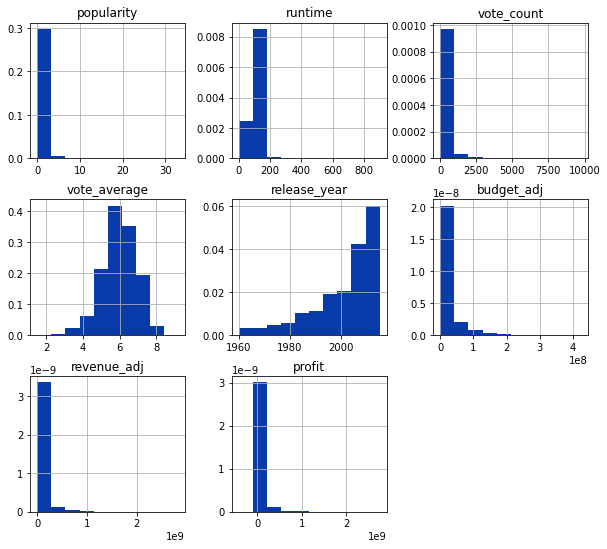

In [29]:
df_movies.hist(figsize=(10,9), density=True, color='#083AA9')
#showing the chart
plt.show()

### <span style='color:#191970'> Question 1. What are the top 20 movies based on their popularity?

In [30]:
#ordering the movies in descending order
df_movies_t = df_movies.groupby('original_title')['popularity'].sum()
df_movies_tt= df_movies_t.sort_values(ascending=False).reset_index()
df_movies_title = df_movies_tt.head(20)
df_movies_title

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Interstellar,24.949134
3,Guardians of the Galaxy,14.311205
4,Insurgent,13.112507
5,Captain America: The Winter Soldier,12.971027
6,Star Wars,12.037933
7,John Wick,11.422751
8,Star Wars: The Force Awakens,11.173104
9,The Hunger Games: Mockingjay - Part 1,10.739009


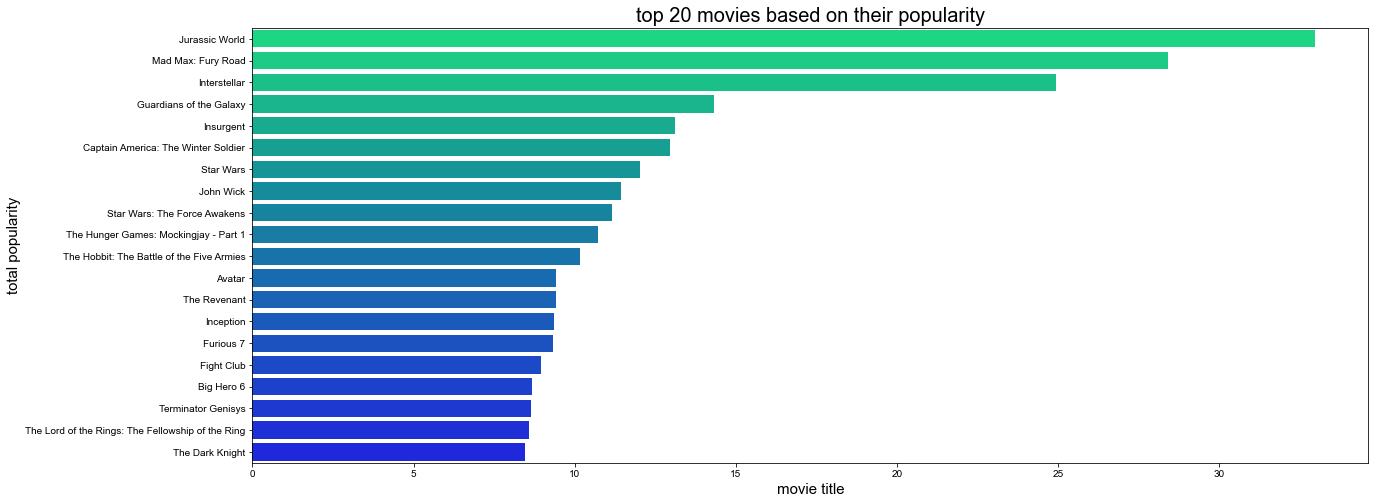

In [31]:
#plotting the chart to display the analysis
plt.figure(figsize=(20,8))
ax = sns.barplot(data =df_movies_title, y='original_title', x='popularity', palette='winter_r',  dodge=False)

#setting the properties for the chart
sns.set_theme(style="darkgrid")
ax.grid(False)
ax.set_title('top 20 movies based on their popularity', fontsize =20)
ax.set_xlabel('movie title', fontsize = 15)
ax.set_ylabel('total popularity', fontsize = 15)

#showing the chart
plt.show()

- From the chart above, it can be seen that Jurassic world movie has the highest popularity follwed by Mad Max etc



### <span style='color:#191970'> Question 2. What are the top 10 movies based on their budget and revenue?

In [32]:
#grouping the movies in descending order of their budget
movies_b = df_movies.groupby('original_title')['budget_adj'].sum()
movies_bdgt = movies_b.sort_values(ascending=False)

#getting the top budget movies
movies_budgt = movies_bdgt.head(10)
movies_budget = movies_budgt.reset_index()

In [33]:
#grouping the movies in descending order of their revenue
movies_r = df_movies.groupby('original_title')['revenue_adj'].sum()
movies_rev = movies_r.sort_values(ascending=False)

#getting the top revenue movies
movies_revne = movies_rev.head(10)
movies_revenue = movies_revne.reset_index()

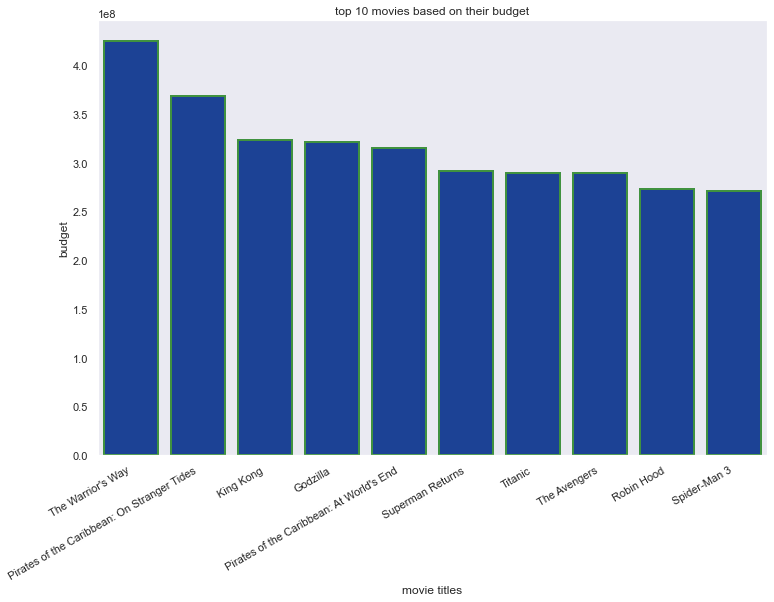

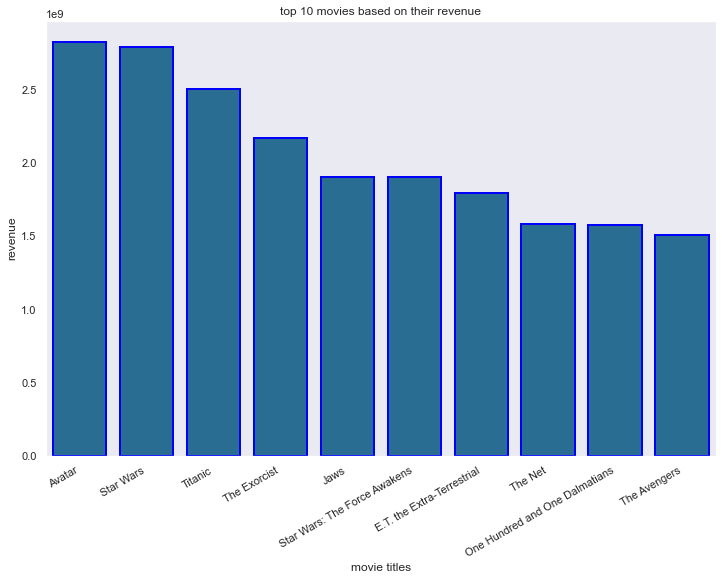

In [34]:
#plotting the chart
plt.figure(figsize=(12,8))
ax = sns.barplot(data = movies_budget, x='original_title', y='budget_adj', color='#083AA9',  edgecolor="#409240", linewidth = 2)
plt.title('top 10 movies based on their budget')
plt.ylabel('budget')
ax.grid(False)
plt.xlabel('movie titles')
plt.xticks(rotation=30, ha='right')
#showing the chart
plt.show()

#plotting the chart
plt.figure(figsize=(12,8))
ax = sns.barplot(data = movies_revenue , x='original_title', y= 'revenue_adj', color='#1972A4',  edgecolor="blue", linewidth = 2)
plt.title('top 10 movies based on their revenue')
ax.grid(False)
plt.ylabel('revenue')
plt.xlabel('movie titles')
plt.xticks(rotation=30, ha='right')

#showing the chart
plt.show()

The chart above indicates that Avatar by James Cameron had the highest revenue generated even though `the warriors way` had the highest budget 

 ### <span style='color:#191970'> Question 3: How do movies budgets and profits compare? Does a high budget equal a high profit?

In [37]:
fig = px.scatter(df_movies ,x = 'profit', y ='budget_adj', trendline = 'ols')
fig.update_layout(title_text ='budget and profit relationship', xaxis_title = 'profit',
                  yaxis_title = 'budget')

#setting the chart properties
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,)

#hiding the gridlines
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)

fig.show()

A positive correlation exists between a decent budget which in turn generates a good profit. Profit and budget have a positive correlation, so there is a good chance that movies with higher investments will result in higher profits.

 ### <span style='color:#191970'> Question 4. What is the distribution of the movies over all the years?

In [38]:
#grouping the movies dist based on year, week and count of movies released
movies_d  = df_movies.groupby(['release_year_ranges', 'release_date_of_week'])['original_title'].count().reset_index()
movies_dist = movies_d.sort_values(['release_year_ranges', 'release_date_of_week'],ascending=False)
movies_dist.head(10)

,release_year_ranges,release_date_of_week,original_title
47,<1960,Wednesday,4
46,<1960,Tuesday,9
45,<1960,Thursday,8
44,<1960,Sunday,3
43,<1960,Saturday,5
42,<1960,Monday,3
41,2010-2020,Wednesday,940
40,2010-2020,Tuesday,846
39,2010-2020,Thursday,1176
38,2010-2020,Sunday,484


In [39]:
#grouping the movies for comparison with earlier result in descending order of their budget
movies_d = df_movies.groupby('release_year_ranges')['original_title'].count()
movies_dist1 = movies_d.sort_values(ascending=False).reset_index()
movies_dist1

,release_year_ranges,original_title
0,2010-2020,6940
1,2000-2010,1860
2,1990-2000,1117
3,1980-1990,545
4,1970-1980,197
5,1960-1970,174
6,<1960,32


In [40]:
#plotting the chart
plt.figure(figsize=(20,8))
fig = px.line(movies_dist, x = 'release_year_ranges', y = 'original_title', color="release_date_of_week")
fig.update_traces(line=dict( width=3.0))

fig.update_layout(title_text ='weekly distribution of movies over the years', xaxis_title = 'year ranges',
                  yaxis_title = 'movies count')
#setting the chart properties
fig.update_layout(
    autosize=False,
    width=1100,
    height=600,)

#showing the chart
fig.show()

<Figure size 1440x576 with 0 Axes>

The maximum number of movies released is between the years 2010-2020, with the majority of them being released on weekdays(Thursdays and Fridays).

 ### <span style='color:#191970'> Question 5. What is the relationship between the popularity and the runtime of movies?

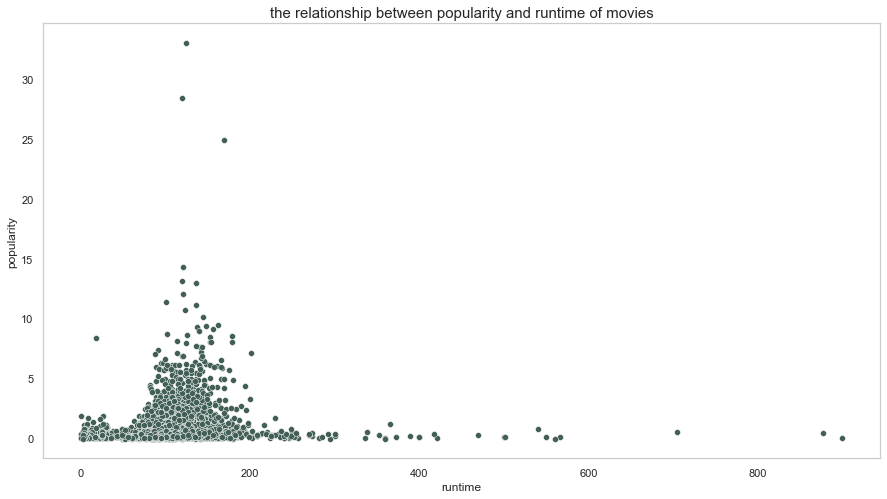

In [62]:
#plotting the results
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

ax = sns.scatterplot(y = 'popularity', x = 'runtime', data = df_movies, color='#425F57')
ax.grid(False)
# setting the properties for the chart
plt.title('the relationship between popularity and runtime of movies', fontsize = 15) 
plt.xlabel('runtime')
plt.ylabel('popularity')

#saving the chart
plt.show()

According to the plot, we can say that movies in the range of 100–200 runtime are more popular, while movies above the runtime of 200 minutes generally have decreased popularity.  This is because long-running movies get boring and unexciting.

 ### <span style='color:#191970'> Question 6. What is the average vote count for each year?

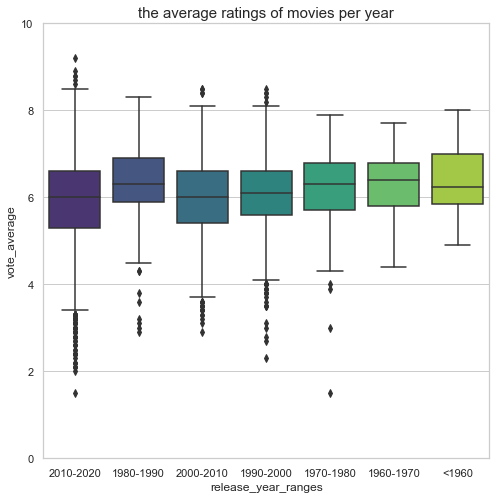

In [75]:
#plotting the chart
fig = plt.figure(figsize=(8,8))
ax = sns.boxplot(y='vote_average', x='release_year_ranges',  data = df_movies, palette ='viridis')
plt.ylim(0,10)
plt.title('the average ratings of movies per year', fontsize = 15)
plt.show()

 ### <span style='color:#191970'> Question 7. The top 10 actors? What is the movie title, average vote count and the revenue generated?

In [79]:
#First calculate the total number of movies by each actor, their revenue, and the average rating average
movies_a = df_movies.groupby('actor')['original_title'].count().reset_index()
movies_r = df_movies.groupby('actor')['profit'].sum().reset_index()
movies_v = round(df_movies.groupby('actor')['vote_average'].mean().reset_index(),2)

In [80]:
# Coupled in a table all
all = movies_a.merge(movies_r, on='actor', how='inner')
all = all.merge(movies_v, on='actor', how='inner')
all

,actor,original_title,profit,vote_average
0,"""Weird Al"" Yankovic",1,-8.794925e+06,6.70
1,50 Cent,6,-3.264166e+07,5.57
2,A. Michael Baldwin,1,-3.677779e+06,5.50
3,A.J. Cook,1,0.000000e+00,5.40
4,AJ Michalka,1,0.000000e+00,6.10
...,...,...,...,...
4296,Ã“lafur Darri Ã“lafsson,1,-2.849233e+06,6.20
4297,Ã“scar Jaenada,1,0.000000e+00,5.30
4298,Ã‡etin Tekindor,1,0.000000e+00,8.20
4299,Ã‰milie Dequenne,1,0.000000e+00,6.00


In [81]:
top_10_actors = all.sort_values(by='profit', ascending=False)[:10].reset_index()         
top_10_actors

,index,actor,original_title,profit,vote_average
0,4059,Tom Hanks,37,7.717645e+09,6.60
1,4052,Tom Cruise,31,7.376906e+09,6.35
2,937,Daniel Radcliffe,14,7.076231e+09,6.94
3,1551,Harrison Ford,30,6.600949e+09,6.19
4,2716,Mark Hamill,4,5.310129e+09,7.62
5,3708,Sean Connery,29,5.126340e+09,6.24
6,3495,Robert Downey Jr.,17,4.733728e+09,6.51
7,3913,Sylvester Stallone,37,4.480025e+09,5.87
8,3651,Sandra Bullock,24,4.367335e+09,5.91
9,4227,Will Smith,16,4.210883e+09,6.49


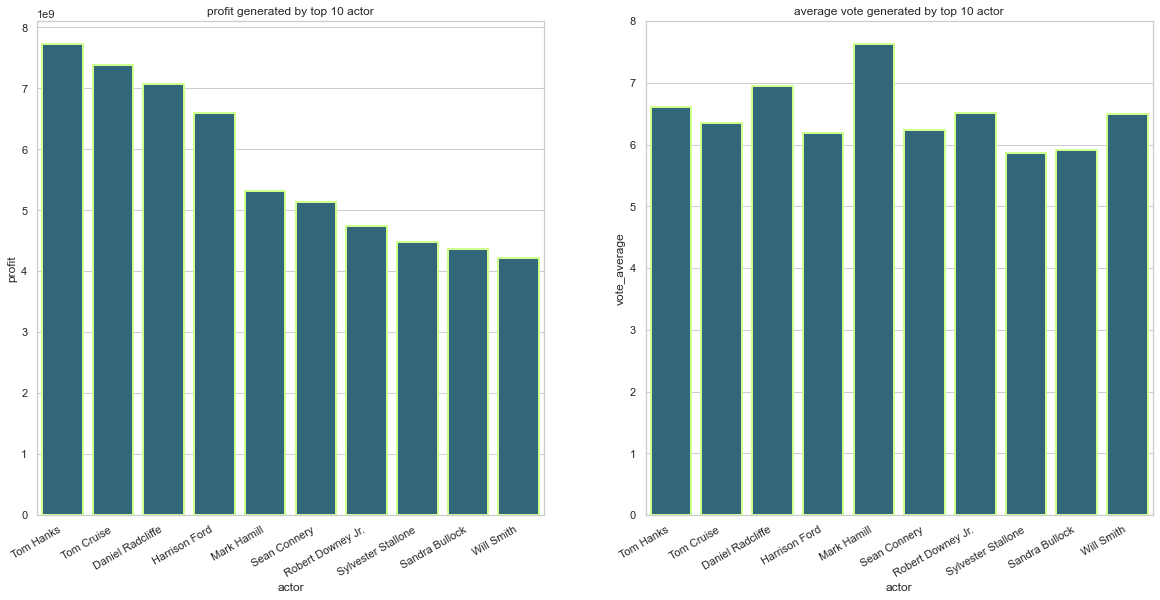

In [82]:
sns.set_style("whitegrid")
#make a subplot of size 1,2

plt.figure(figsize=(20,20))
fig.tight_layout(pad=3)

#actors revenue generated plot
plt.subplot(2,2,1)
ax1 = sns.barplot(data = top_10_actors, x='actor', y='profit', color='#256D85',  edgecolor="#CFFF8D", linewidth = 2)
ax1.title.set_text('profit generated by top 10 actor')
plt.xticks(rotation=30, ha='right')

#actors average voters plot
plt.subplot(2,2,2)
ax2 = sns.barplot(data = top_10_actors, x='actor', y='vote_average', color='#256D85',  edgecolor="#CFFF8D", linewidth = 2)
ax2.title.set_text('average vote generated by top 10 actor')
plt.xticks(rotation=30, ha='right')
plt.show()

From the charts above, we can see that in terms of profit, Tom Hanks's movies generated a lot of profit and one of the highest count of movies released and fairly high ratings, while Sylvester Stallone also has the highest movie count and Mark Hamill has the highest average ratings.

 ### <span style='color:#191970'> Question 8. Which genre has the highest release of movies?

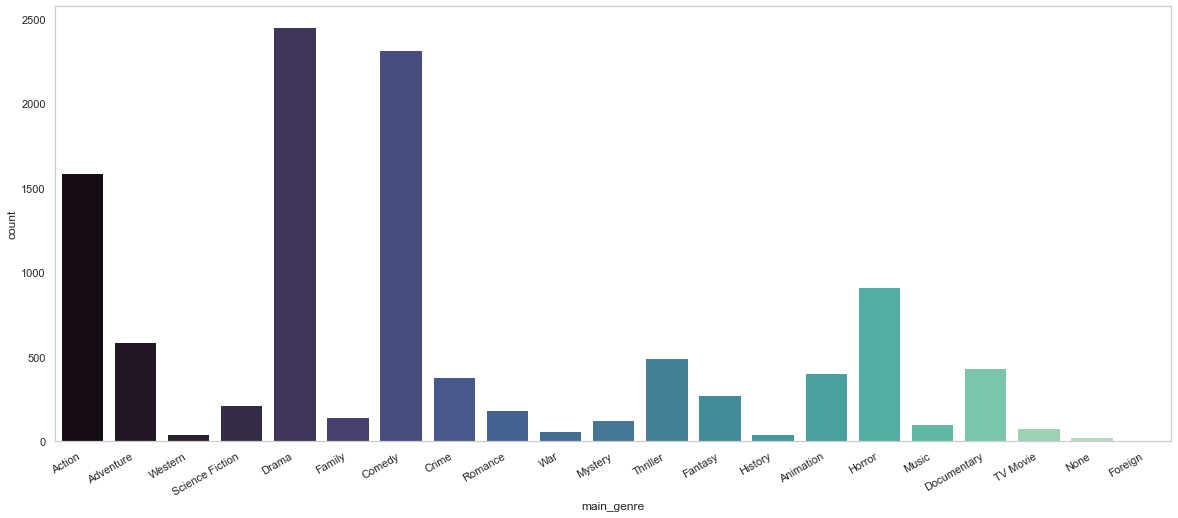

In [68]:
# count plot on single categorical variable
plt.figure(figsize = (20,8))
plt.xticks(rotation = 30, ha='right')
ax = sns.countplot(x ='main_genre', data = df_movies,  palette ='mako')
ax.grid(False)
plt.show()

According to the above analysis, drama is the most popular genre when compared to other categories, followed by comedy, action, and horror.

### <span style='color:#191970'> Question 9. Top 5 Directors: Who directs the movies with the highest revenue generated?

In [69]:
top_directors = df_movies.groupby('director')['revenue_adj'].sum().reset_index().sort_values(['revenue_adj'], 
            ascending=False)[:5]
top_directors

,director,revenue_adj
4602,Steven Spielberg,1.520245e+10
1997,James Cameron,7.327221e+09
3801,Peter Jackson,7.019848e+09
1679,George Lucas,6.313919e+09
4141,Robert Zemeckis,5.655648e+09


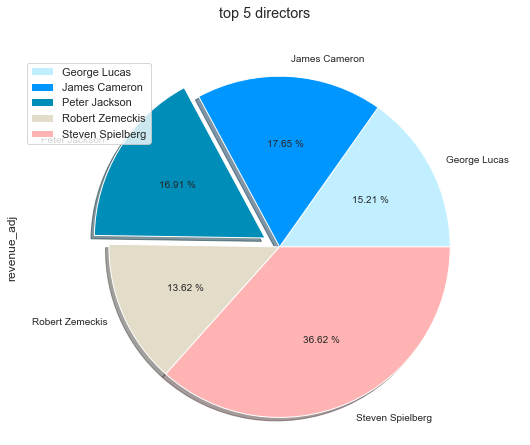

In [70]:
# fig = plt.gcf()
# fig.set_size_inches(8,8)

# fig = plt.gcf()
# fig.set_size_inches(7,7)
# plt.figure(figsize = (20,8))
explode = [0, 0,0.1,0,0]
top_directors.groupby(['director']).sum().plot(kind='pie', y='revenue_adj', autopct='%.2f %%', 
                    colors = ['#C1EFFF', '#0096FF', '#008DB8', '#E2DCC8', '#FFB3B3'],
                    title = 'top 5 directors', 
                    explode = explode, fontsize=10, shadow = True, 
                    subplots='true',
                    figsize=(9,7))

#setting the properties for the chart
plt.axis('equal')
plt.legend(loc = 'upper left')

#saving the chart
plt.show()

Steven Spielberg directed the most popular movie, `Jurassic World` and a couple of other movies, so it's kind of expected to be the director with the highest revenue generated.

### <span style='color:#191970'> Question 10. Which Month Released The Highest Number Of Movies In All Of The Years? And which month made the highest average revenue?

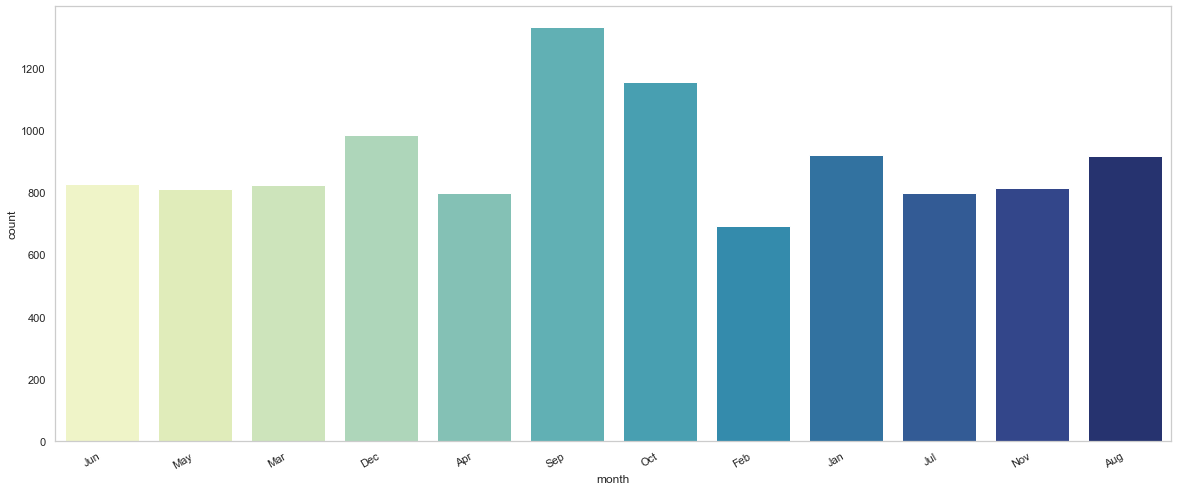

In [72]:
# count plot on single categorical variable
plt.figure(figsize = (20,8))
plt.xticks(rotation = 30, ha='right')
ax = sns.countplot(x ='month', data = df_movies,  palette ='YlGnBu')
ax.grid(False)
plt.show()

From the plot trend, we can conclude that there are a higher number of movies released in September and in October.

## Conclusion
From the overall analysis, certain conclusions have been drawn, which include the following

- Short duration movies are more popular than long duration movies.

- Movies with high revenue have shown a corresponding increase in the profit. There is a high probability that movies with higher investments result in better profit.

- September, October and December are most popular month for movies released.

- Drama is the most popular genre, followed by action, comedy and horror.

- Drama, Comedy,Action and Horror are top genres in this dataset.

- The most bankable star that can generate the highest total profit  is Tom Hanks. The bankable actor will attract people to go to see movies.

- According to TMDB dataset, all times most popular movies are Jurassic World, Mad Max: Fury Road, and Interstellar.

- The most filmed director was Steven Spielberg, James Cameron, and Peter Jackson.